In [22]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.research import run_pipeline, get_forward_returns, prices
import alphalens as al

In [23]:
def make_pipeline():

    base_universe = QTradableStocksUS()

    sentiment_score = SimpleMovingAverage(
        inputs=[stocktwits.bull_minus_bear],
        window_length=3
    )
    
    top_bottom_scores = (
    sentiment_score.top(350) | sentiment_score.bottom(350))
        
    return Pipeline(
        columns={
            'sentiment_score': sentiment_score,
        },
        screen=(
            base_universe&
            top_bottom_scores
        )
    )

In [24]:
period_start = '2013-01-01'
period_end = '2016-01-01'

pipeline_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

In [25]:
print("Result contains {} rows".format(len(pipeline_output)))
pipeline_output.head()

Result contains 1588320 rows


sentiment_score
2013-01-02 00:00:00+00:00 Equity(2 [HWM])           0.656667
                          Equity(24 [AAPL])        -0.013333
                          Equity(31 [ABAX])         0.000000
                          Equity(39 [DDC])               NaN
                          Equity(52 [ABM])          2.560000

In [15]:
returns_df = get_forward_returns(
    pipeline_output['sentiment_score'],
    [1,5,10],
    US_EQUITIES
)

In [18]:
al_data = al.utils.get_clean_factor(
    pipeline_output['sentiment_score'],
    returns_df,
    quantiles=2,
    bins=None,
)

Dropped 0.2% entries from factor data: 0.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-4.00,2.25,-1.604412,0.880667,87674,50.989561
2,-2.12,3.89,2.136217,0.885784,84271,49.010439


Returns Analysis


,1D,5D,10D
Ann. alpha,0.005,0.012,0.012
beta,-0.023,-0.038,-0.041
Mean Period Wise Return Top Quantile (bps),0.263,0.389,0.296
Mean Period Wise Return Bottom Quantile (bps),-0.224,-0.390,-0.308
Mean Period Wise Spread (bps),0.487,0.778,0.603


<Figure size 1008x576 with 0 Axes>

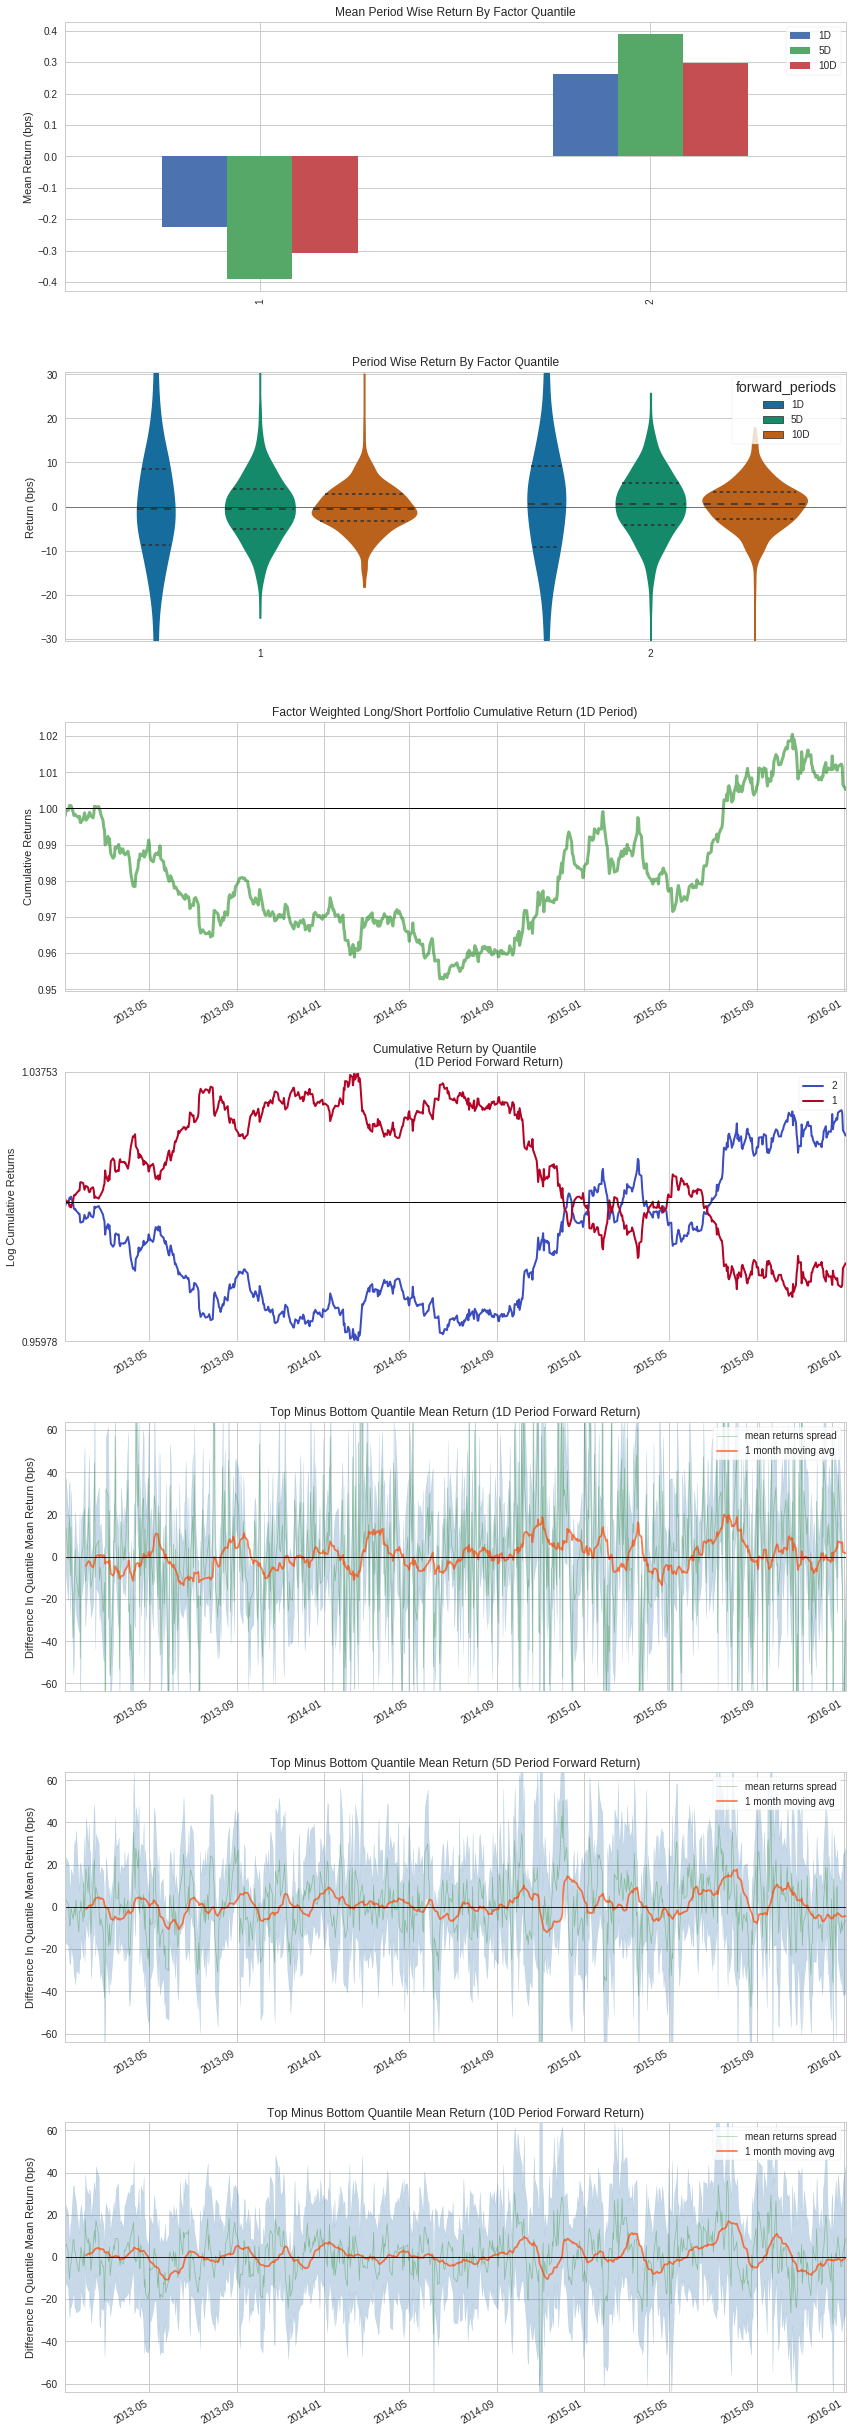

Information Analysis


,1D,5D,10D
IC Mean,0.001,0.004,0.004
IC Std.,0.078,0.083,0.079
Risk-Adjusted IC,0.013,0.048,0.050
t-stat(IC),0.351,1.311,1.370
p-value(IC),0.726,0.190,0.171
IC Skew,0.072,0.071,0.019
IC Kurtosis,-0.031,-0.073,0.025


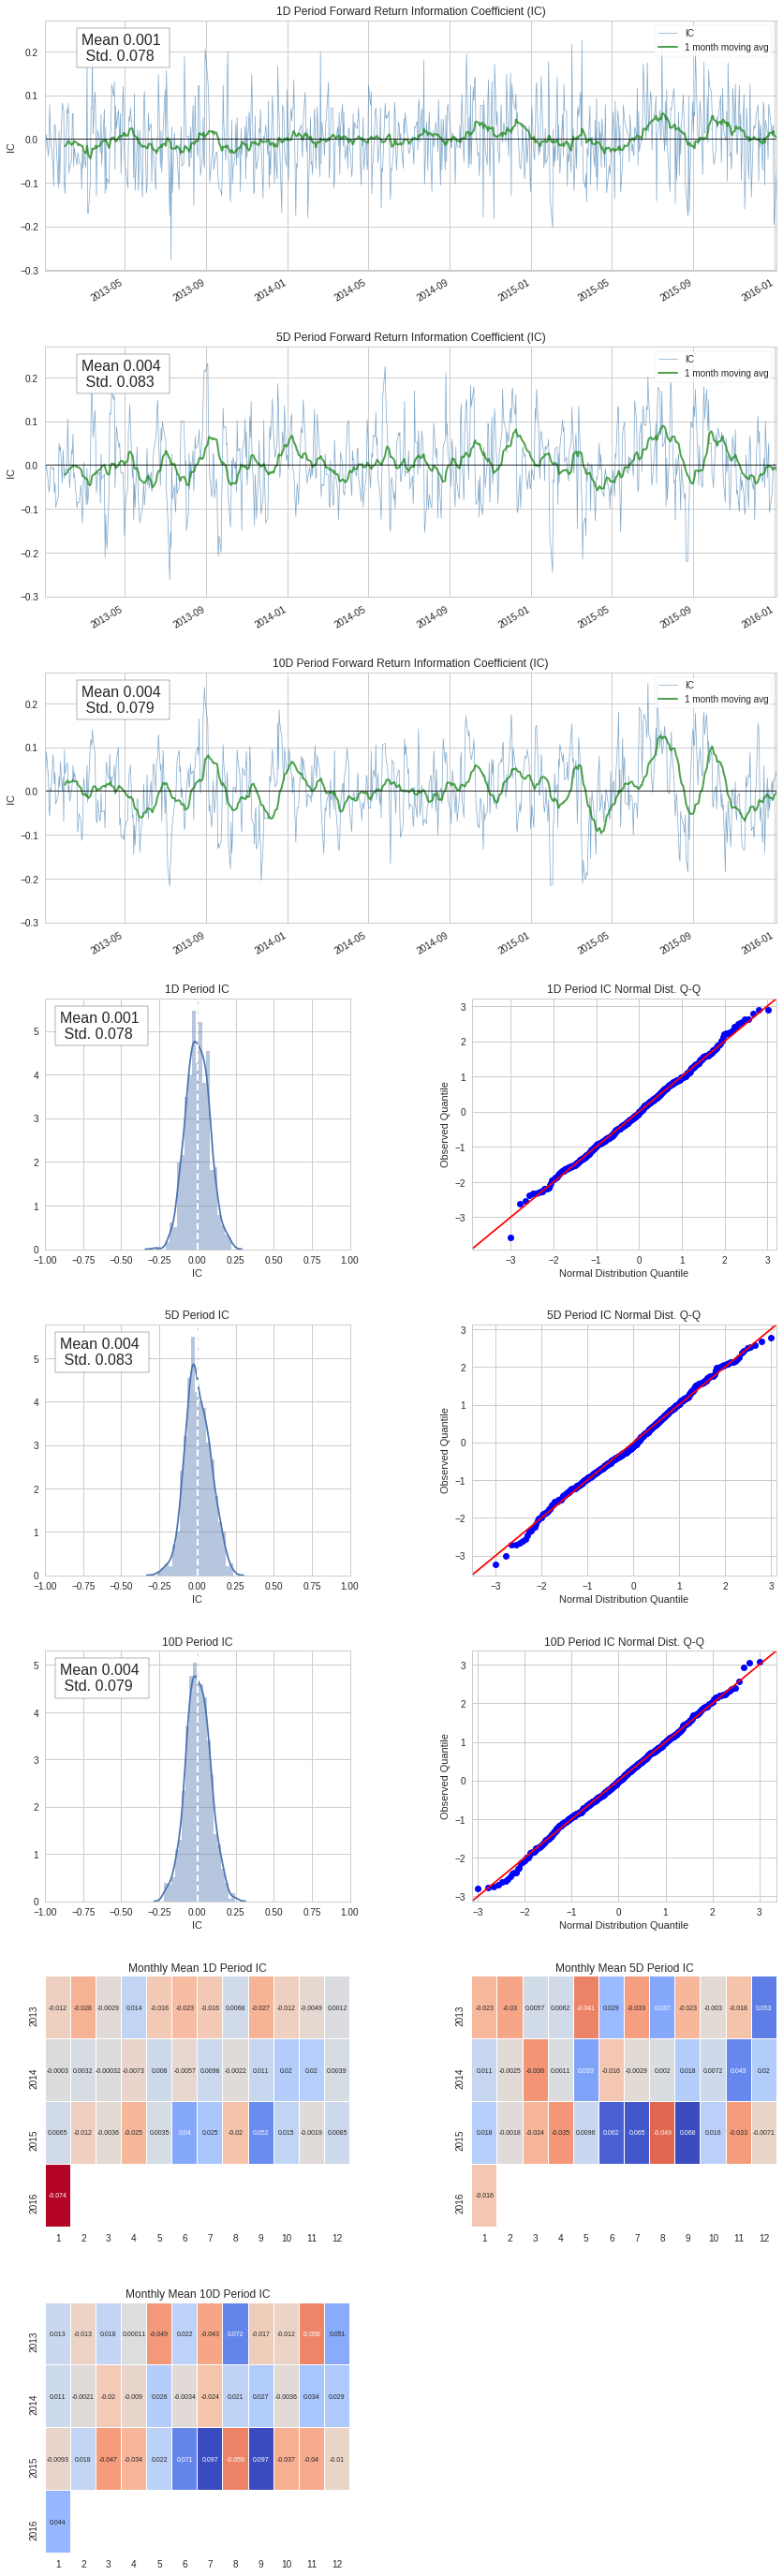

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.352,0.812,0.888
Quantile 2 Mean Turnover,0.431,0.825,0.896


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.917,0.613,0.359


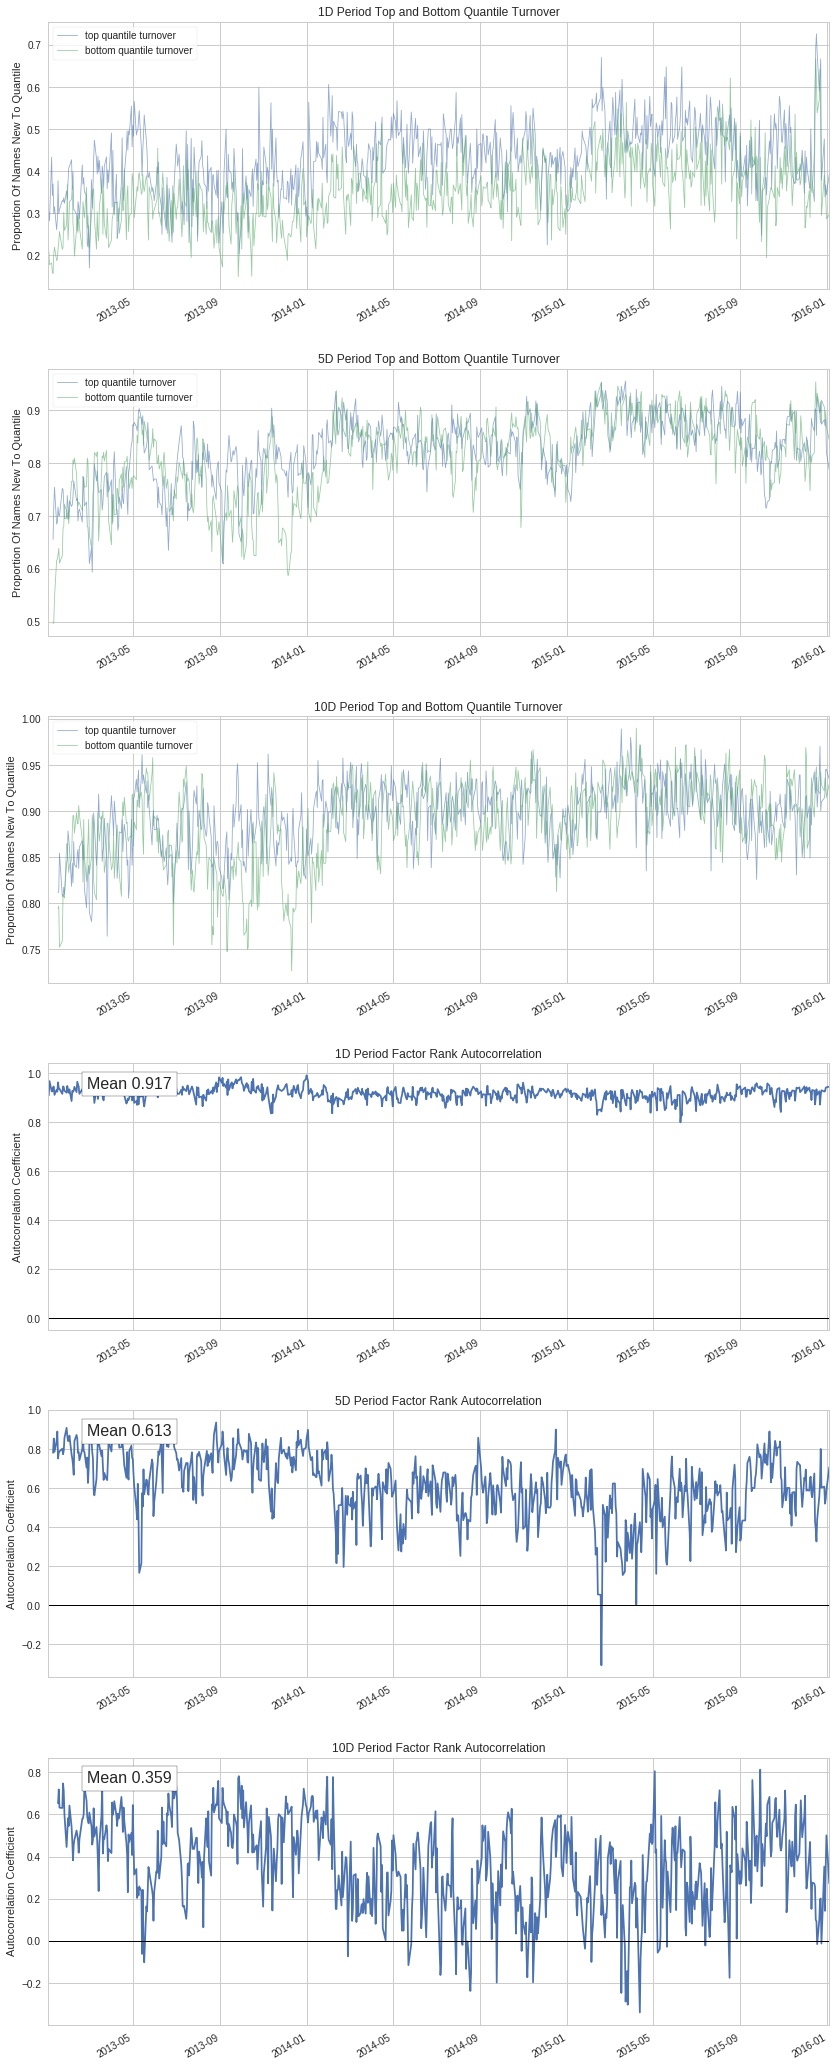

In [19]:
from alphalens.tears import create_full_tear_sheet

create_full_tear_sheet(al_data)

In [21]:
US_EQUITIES

EquityCalendarDomain('US', 'XNYS')